In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
plt.rcParams["figure.figsize"]=10,10


In [ ]:
def closest(lst, K):

 lst = np.asarray(lst)
 idx = (np.abs(lst - K)).argmin()
 return lst[idx]

In [ ]:
def spec(img_name):
 im = Image.open(img_name)
 pix = im.load()
 width, height=im.size
 print(width,":",height)
 x_all=[]
 y_all=[]
 wl_start=400
 wl_end=700
 wl_range=wl_end-wl_start
 wl_p_pix=wl_range/width
 
 for i in range(0,width): 
    s = 0.0
    c = 0
    for j in range(0,height):
        RGB=pix[i,j]
        s+=0.21*int(RGB[0]) + 0.72*int(RGB[1]) + 0.07*int(RGB[2]) #luminosity method
        c += 1.0 
    x_all.append(i*wl_p_pix+wl_start)
    y_all.append(s/c)
 y_all=np.array(y_all) 
 y_all=y_all[::-1]
 
 index_max=np.where(y_all==max(y_all))
 index_max=np.array(index_max,dtype='i')
 peak_start=(index_max[0][0]-1)*wl_p_pix+wl_start
 last_index=len(index_max)
 peak_end=(index_max[last_index-1][0])*wl_p_pix+wl_start
 max_x=(peak_end+peak_start)/2
 max_in_wl_err=(peak_end-peak_start)/2
 return [x_all,y_all,max_x]

In [ ]:
x0,y0,max_x0=spec('pure.jpg')
#x1,y1,max_x1=spec('1pd.jpg')
#x2,y2,max_x2=spec('2pd.jpg')
x3,y3,max_x3=spec('4%.jpg')
x4,y4,max_x4=spec('6%.jpg')
x5,y5,max_x5=spec('8%.jpg')
x6,y6,max_x6=spec('10%.jpg')
x7,y7,max_x7=spec('13%.jpg')
x8,y8,max_x8=spec('15%.jpg')

#x9,y9,max_x9=spec('unk8.jpg')


891 : 1310
891 : 1310
891 : 1310
891 : 1310
891 : 1310
891 : 1310
891 : 1310


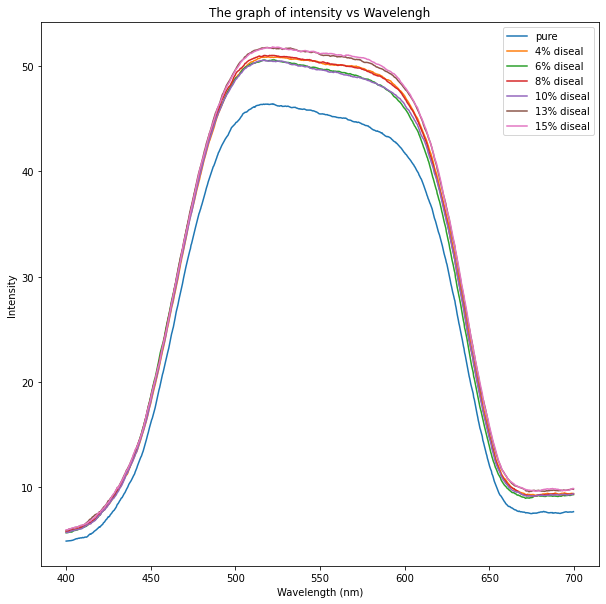

In [ ]:

plt.plot(x0,y0,label='pure')
#plt.plot(x1,y1,label=' 1% diseal')
#plt.plot(x2,y2,label='2% diseal')
plt.plot(x3,y3,label='4% diseal')
plt.plot(x4,y4,label='6% diseal')
plt.plot(x5,y5,label='8% diseal')
plt.plot(x6,y6,label='10% diseal')
plt.plot(x7,y7,label='13% diseal')
plt.plot(x8,y8,label='15% diseal')


plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
#plt.ylim([60,80])
#plt.xlim([400,500])
plt.title('The graph of intensity vs Wavelengh')
plt.legend()


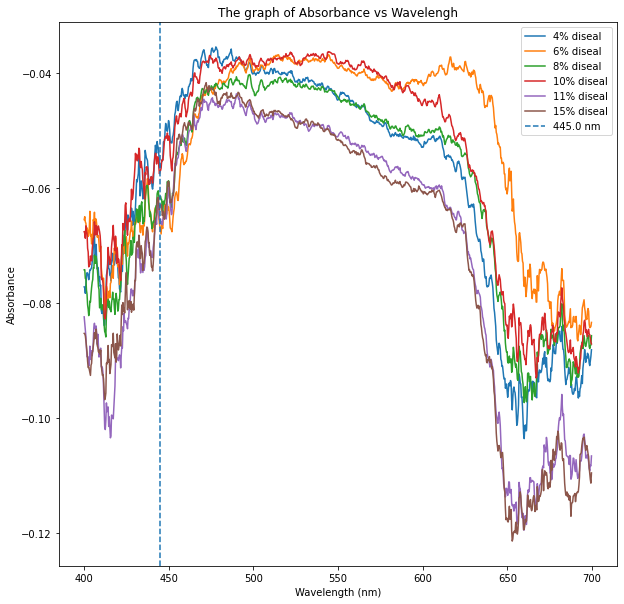

In [ ]:
#t1=y1/y0
#t2=y2/y0
t3=y3/y0
t4=y4/y0
t5=y5/y0
t6=y6/y0
t7=y7/y0
t8=y8/y0
#t9=y9/y0

#a1=-(np.log10(t1))
#a2=-(np.log10(t2))
a3=-(np.log10(t3))
a4=-(np.log10(t4))
a5=-(np.log10(t5))
a6=-(np.log10(t6))
a7=-(np.log10(t7))
a8=-(np.log10(t8))
#a9=-(np.log10(t9))

#plt.plot(x0,a1,label='1% diseal')
#plt.plot(x0,a2,label='2% diseal')
plt.plot(x0,a3,label='4% diseal')
plt.plot(x0,a4,label='6% diseal')
plt.plot(x0,a5,label='8% diseal')
plt.plot(x0,a6,label='10% diseal')
plt.plot(x0,a7,label='11% diseal')
plt.plot(x0,a8,label='15% diseal')

ab_wl=445
plt.axvline(x=ab_wl,linestyle='--',label='%.1f nm'%ab_wl)
#plt.ylim([0,0.06])
#plt.xlim([400,500])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('The graph of Absorbance vs Wavelengh')
plt.legend()

In [ ]:
c_wl=closest(x0, ab_wl)
print(c_wl)
index=np.where(x0==c_wl)
print(index)

445.11784511784515
(array([134]),)


In [ ]:
#ab1=a1[index[0]][0]
#ab2=a2[index[0]][0]
ab3=a3[index[0]][0]
ab4=a4[index[0]][0]
ab5=a5[index[0]][0]
ab6=a6[index[0]][0]
ab7=a7[index[0]][0]
ab7=a7[index[0]][0]
ab8=a8[index[0]][0]
#ab9=a9[index[0]][0]

#print('absorbance (1% diseal) : '+str(ab1))
#print('absorbance (1 mol dm-3) : '+str(ab2))
print('absorbance (4% diseal) : '+str(ab3))
print('absorbance (6% diseal) : '+str(ab4))
print('absorbance (8% diseal) : '+str(ab5))
print('absorbance (10% diseal) : '+str(ab6))
print('absorbance (15% diseal) : '+str(ab7))
print('absorbance (18% diseal) : '+str(ab8))
#print('absorbance (Unknown diseal) : '+str(ab9))

absorbance (4% diseal) : -0.056137648686799574
absorbance (6% diseal) : -0.0674761631454033
absorbance (8% diseal) : -0.061412472404970865
absorbance (10% diseal) : -0.056896224618224446
absorbance (15% diseal) : -0.06535120392670944
absorbance (18% diseal) : -0.0628652855889234


In [ ]:
con=[0.201,0.305,0.407,0.508,0.566,.763,] # concentrations of samples
abso=[ab3,ab4,ab5,ab6,ab7,ab8]
coefs=np.polyfit(con, abso, 1)
fitf = np.poly1d(coefs)
print(fitf)

 
0.08262 x - 0.006913


In [ ]:
l=2 # optical path length
m=coefs[0]
c=coefs[1]
print('gradient of graph: '+str(m))
e=m/l
print('absoption coefficient at %.1f nm: '%ab_wl+str(e))

gradient of graph: 0.08261504477032887
absoption coefficient at 445.0 nm: 0.041307522385164434


In [ ]:
unk_con=ab9/(e*l)
print('unknown concentration: '+str(unk_con)+' moldm-3')


unknown concentration: 0.6371665865475571 moldm-3


In [ ]:
err_i=math.sqrt((0.21)**2+(0.72)**2+(0.07)**2)
def err_a(t,y):
 err_a=(np.log10(math.e))*(np.sqrt((1/y)**2+(1/y0)**2))*err_i
 return err_a

In [ ]:
#err_a1=err_a(t1,y1)
#err_a2=err_a(t2,y2)
err_a3=err_a(t3,y3)
err_a4=err_a(t4,y4)
err_a5=err_a(t5,y5)
err_a6=err_a(t6,y6)
err_a7=err_a(t7,y7)
err_a9=err_a(t9,y9)

#err_ab1=err_a1[index[0]][0]
#err_ab2=err_a2[index[0]][0]
err_ab3=err_a3[index[0]][0]
err_ab4=err_a4[index[0]][0]
err_ab5=err_a5[index[0]][0]
err_ab6=err_a6[index[0]][0]
err_ab7=err_a7[index[0]][0]
err_ab9=err_a9[index[0]][0]
err_abso=[err_ab3,err_ab4,err_ab5,err_ab6,err_ab7,err_ab9]
print(err_abso)

[0.006497253742182542, 0.00653640398055157, 0.0066114586591570195, 0.006738259210226259, 0.006781138997234349, 0.006849111470459661]


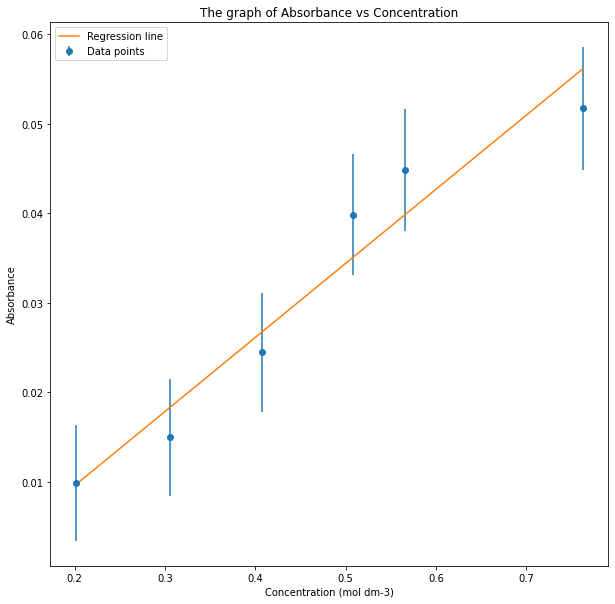

In [ ]:
plt.errorbar(con, abso, yerr=err_abso, fmt='o',label='Data points')
plt.plot(con,fitf(con),label='Regression line')
plt.xlabel('Concentration (mol dm-3)')
plt.ylabel('Absorbance')
plt.title('The graph of Absorbance vs Concentration' )
plt.legend(loc='upper left')


In [ ]:
n=len(err_abso)
s_x2=0
s_x=0
s=0
for i in range(0,n):
 s_x2=s_x2+((con[i]**2)/(err_abso[i]**2))
 s_x=s_x+(con[i]/(err_abso[i]**2))
 s=s+(1/(err_abso[i]**2))
 
d=s*s_x2-s_x**2
err_m=math.sqrt(s/d)
err_c=math.sqrt(s_x2/d)
print('error of gradient: '+str(err_m))
print('error of intersection: '+str(err_c))


error of gradient: 0.015572634639661576
error of intersection: 0.007319947359562405


In [ ]:
err_l=0.05
err_e=e*math.sqrt((err_m/m)**2+(err_l/l)**2)
print('error of absorption coefficient: '+str(err_e))
err_unk_con=unk_con*(math.sqrt((err_ab7/ab7)**2+(err_e/e)**2+(err_l/l)**2))
print('error of unknown concentation: '+str(err_unk_con))


error of absorption coefficient: 0.007848890927912045
error of unknown concentation: -0.3612946347087112
